## Part 0: Preparation

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd 
import numpy as np 
import nltk
import re
os.chdir('/content/drive/My Drive/MOYI')
os.listdir() ##把里面的文件以一个list的形式

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df_nasdaq = pd.read_csv('Nasdaq_news_summary.csv')
df_nasdaq.tail()
## delete empty or space
#df_nasdaq.body.str.lstrip()
#df_nasdaq.title.str.lstrip()

,symbol,symbol.1,title,publish_date,url,body
9886,ZTS,ZTS,3 Big Stock Charts for Wednesday: Stryker Zoe...,11/13/2019 7:10,https://www.nasdaq.com/articles/3-big-stock-ch...,U.S. stocks on Tuesday posted yet another quie...
9887,ZTS,ZTS,We Love Our Pets and IDEXX Knows It,11/12/2019 9:05,https://www.nasdaq.com/articles/we-love-our-pe...,Last week I took my dog Sully to the vet becau...
9888,ZTS,ZTS,Ex-Dividend Reminder: Ford Motor Zoetis and H...,10/17/2019 10:31,https://www.nasdaq.com/articles/ex-dividend-re...,Looking at the universe of stocks we cover at ...
9889,ZTS,ZTS,Notable ETF Inflow Detected - XLV SYK ANTM ZTS,10/10/2019 11:15,https://www.nasdaq.com/articles/notable-etf-in...,Looking today at week-over-week shares outstan...
9890,ZTS,ZTS,Daily Dividend Report: RPM CVS ZTS PSX LEN,10/4/2019 14:37,https://www.nasdaq.com/articles/daily-dividend...,RPM International (RPM) declared a regular qua...


In [4]:
df_nasdaq = df_nasdaq[['title', 'body']]
df_nasdaq.tail()

,title,body
9886,3 Big Stock Charts for Wednesday: Stryker Zoe...,U.S. stocks on Tuesday posted yet another quie...
9887,We Love Our Pets and IDEXX Knows It,Last week I took my dog Sully to the vet becau...
9888,Ex-Dividend Reminder: Ford Motor Zoetis and H...,Looking at the universe of stocks we cover at ...
9889,Notable ETF Inflow Detected - XLV SYK ANTM ZTS,Looking today at week-over-week shares outstan...
9890,Daily Dividend Report: RPM CVS ZTS PSX LEN,RPM International (RPM) declared a regular qua...


In [5]:
df_nasdaq.isna().sum(axis =  0)

title    19
body     19
dtype: int64

In [0]:
df_nasdaq.dropna(inplace = True)
df_nasdaq.reset_index(inplace = True)

In [7]:
df_nasdaq.tail()

,index,title,body
9867,9886,3 Big Stock Charts for Wednesday: Stryker Zoe...,U.S. stocks on Tuesday posted yet another quie...
9868,9887,We Love Our Pets and IDEXX Knows It,Last week I took my dog Sully to the vet becau...
9869,9888,Ex-Dividend Reminder: Ford Motor Zoetis and H...,Looking at the universe of stocks we cover at ...
9870,9889,Notable ETF Inflow Detected - XLV SYK ANTM ZTS,Looking today at week-over-week shares outstan...
9871,9890,Daily Dividend Report: RPM CVS ZTS PSX LEN,RPM International (RPM) declared a regular qua...


## Part 1   Read title 和 body thoes two columns 

> Indented block



In [8]:
title = []
body = []

for i in range(len(df_nasdaq)):
    title.append(df_nasdaq.title[i])
    body.append(df_nasdaq.body[i])
print(type(body))
for i in body[:5]:
  print(i)


<class 'list'>
If you're trying to build wealth  then you should absolutely avoid buying penny stocks. Individuals drawn to the low  low share prices offered by micro-cap companies often let emotions get the best of them and fail to accurately characterize the risk involved. Rather than gambling away your hard-earned money  it makes more sense to invest in sound businesses at great prices. To be blunt  that can be a little boring. So  if you want to have a little fun and potentially earn an eye-popping return  then consider buying a small stake in a risky small-cap stock with promise. Here's why Pacific Biosciences (NASDAQ: PACB) and Avid Bioservices (NASDAQ: CDMO) may fit that label.Image source: Getty Images.A failed merger  but a rapidly improving technology platformIt appears that the merger between Illumina (NASDAQ: ILMN) and Pacific Biosciences will be nixed by trade authorities in the United Kingdom and the United States. At first glance  it's easy to think that's a worst-case s

# Part 2： Tokenizing and Stemming 

In [9]:
#  use nltk's english stopwords: 
stopwords = nltk.corpus.stopwords.words('english')
print ("We use " + str(len(stopwords)) + "stop-words from nltk library.")
print(stopwords[:10])

We use 179stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [0]:
from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")
# tokenization and stemming 
#def tokenization_and_stemming(text):
  #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
  #filtered_tokens = []
  ## filter out any tokens not containing letters
  #for token in tokens:
    #if re.search('[a-zA-Z]',token):
      #filtered_tokens.append(token)

  # stemming 
  #stems = [stemmer.stem(t) for t in filtered_tokens]
  #return stems


## tokenization without stemming 
def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens
def tokenization_Lemmatization(text): #因为stemmming是单纯的去词根
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    res = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return res

In [11]:
## lemmatizer 
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("apples")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'apple'

In [12]:
## Create lemmatizer and tokenized words from body
docs_lemmatizer_body=[]
docs_tokenized_body =[]
for i in body:
   lemmatizer_results = tokenization_Lemmatization(i)
   docs_lemmatizer_body.extend(lemmatizer_results)
   tokenized_results = tokenization(i)
   docs_tokenized_body.extend(tokenized_results)
print(docs_lemmatizer_body)
print(docs_tokenized_body)
# Create lemmatizer and tokenized words from title 
docs_lemmatizer_title=[]
docs_tokenized_title =[]
for g in title:
   lemmatizer_results_a = tokenization_Lemmatization(g)
   docs_lemmatizer_title.extend(lemmatizer_results_a)
   tokenized_results_a = tokenization(g)
   docs_tokenized_title.extend(tokenized_results_a)
print(docs_lemmatizer_title)
print(docs_tokenized_title)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['about', 'buy', 'penny', 'stock', 'look', 'at', 'these', 'company', 'first', 'ex-dividend', 'reminder', 'national', 'research', 'agilent', 'technology', 'national', 'healthcare', 'why', 'i', "'d", 'avoid', 'these', 'marijuana', 'etns', 'like', 'plague', 'noteworthy', 'tuesday', 'option', 'activity', 'cl', 'hog', 'a', 'validea', "'s", 'top', 'five', 'technology', 'stock', 'based', 'on', 'peter', 'lynch', 'daily', 'dividend', 'report', 'a', 'ssnc', 're', 'gpi', 'cb', 'noc', 'here', "'s", 'why', 'pacific', 'bioscience', 'gained', 'much', 'today', 'notable', 'wednesday', 'option', 'activity', 'lii', 'wsm', 'a', 'stock', 'this', 'top', 'wall', 'street', 'pro', 'is', 'buying', 'right', 'now', 'notable', 'friday', 'option', 'activity', 'a', 'adsk', 'gd', 'a', 'comcast', 'attack', 'is', 'repelled', 'roku', 'stock', 'look', 'better', 'than', 'ever', 'after-hours', 'earnings', 'report', 'october', 'ibm', 'nflx', 'cci', 'csx', 'kmi', 'uri', 'cck', 'slg', 'stld', 'rli', 'wtfc', 'aa', 'top', 'u.s.

In [13]:
 print(len(docs_lemmatizer_body))
print(len(docs_tokenized_body))
print(len(docs_lemmatizer_title))
print(len(docs_tokenized_title))

4263368
4263368
73629
73629


# Part 3: Get negative and postive words

In [14]:
## Use opinion_lexicon to count negative and positive words
from nltk.tokenize import TreebankWordTokenizer 
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
post_list = set(opinion_lexicon.positive())
neg_list = set(opinion_lexicon.negative())
print(post_list)
print(neg_list)


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
{'intimate', 'standout', 'suffices', 'politeness', 'terrific', 'dominates', 'issue-free', 'gallantly', 'exultingly', 'apotheosis', 'leverage', 'audible', 'rejoicingly', 'magnificently', 'enrapt', 'excellant', 'diplomatic', 'prominence', 'soulful', 'phenomenal', 'happier', 'relief', 'ilu', 'victory', 'delightfully', 'judicious', 'smoothly', 'charitable', 'paramount', 'resound', 'unlimited', 'enjoys', 'achievible', 'vivacious', 'correctly', 'faithfully', 'charismatic', 'truthful', 'affection', 'pure', 'impartial', 'ideal', 'formidable', 'celebrate', 'hardier', 'efficiently', 'comfortable', 'festive', 'virtuous', 'personalized', 'proving', 'reaffirm', 'civility', 'splendidly', 'competitive', 'beautify', 'benefits', 'prestige', 'visionary', 'unreal', 'adoring', 'revolutionary', 'warmer', 'gratified', 'entrancing', 'groundbreaking', 'handsome', 'superbly', 'gumption', '

In [15]:
print(len(post_list))
print(len(neg_list))

2006
4783


# Part 4: Build on the postive and negative list of lemmatizer body and lemmatizer title 

In [0]:
def sentiment(x): 
    docs_lemmatizer_body_positive = []
    docs_lemmatizer_body_negative = []
    words = [word() for word in x ]
    for i in words: 
        if word in post_list: 
            docs_lemmatizer_body_positive.append(docs_lemmatizer_body_positive(i))
        elif word in neg_list:
            docs_lemmatizer_body_negative.append(docs_lemmatizer_body_negative(i))
    return docs_lemmatizer_body_positive


In [0]:
def sentiment_zh(x): 
    docs_lemmatizer_body_positive = []
    docs_lemmatizer_body_negative = []
    for i in x: 
        if i in post_list: 
            docs_lemmatizer_body_positive.append(i)
        else:
            docs_lemmatizer_body_negative.append(i)
    return docs_lemmatizer_body_positive, docs_lemmatizer_body_negative

In [18]:
a, b  = sentiment_zh(docs_lemmatizer_body)
print(a[:10])
print()
print(b[:10]) 

['best', 'accurately', 'great', 'fun', 'promise', 'avid', 'improving', 'easy', 'well', 'optimism']

['if', "'re", 'trying', 'build', 'wealth', 'absolutely', 'avoid', 'buying', 'penny', 'stock']


In [19]:
## Create mapping  from lemmatization words to tokenized words for result interpretation 
vocab_frame_dict = {docs_lemmatizer_body[x]:docs_tokenized_body[x] for x in range(len(docs_lemmatizer_body))} #  dict = {key(冒号左边是键): value for key, value in  
print (vocab_frame_dict['angel']) ## 打印出来的结果是这个词 不是词根

angel


## Part 5 TF-IDF

In [0]:
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=2000,
                              min_df = 0.1, stop_words='english', 
                              use_idf = True, tokenizer=tokenization_Lemmatization, ngram_range=(1,3))
tfidf_matrix = tfidf_model.fit_transform(body[:])


In [21]:
print(tfidf_matrix.shape)

(9872, 487)


In [22]:
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 2000,
 'min_df': 0.1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_Lemmatization>,
 'use_idf': True,
 'vocabulary': None}

Calculate Document Similarity 

In [23]:
tf_selected_words = tfidf_model.get_feature_names()###根据权重排序的
print(len(tf_selected_words))   

487


In [24]:
tf_selected_words[:10]

["'re",
 "'s",
 "'s right",
 "'s right think",
 '*david',
 '*david tom',
 '*david tom revealed',
 '*stock',
 '*stock advisor',
 '*stock advisor return']

In [25]:
# tf-idf matrix
tfidf_matrix

<9872x487 sparse matrix of type '<class 'numpy.float64'>'
	with 967652 stored elements in Compressed Sparse Row format>

In [26]:
# use cosine similarity to check  the similarity for documents 
from sklearn.metrics.pairwise import cosine_similarity 
cos_matrix = cosine_similarity(tfidf_matrix)
print(cos_matrix)

[[1.         0.11208809 0.28571045 ... 0.1433711  0.07635182 0.0818413 ]
 [0.11208809 1.         0.05368923 ... 0.76653308 0.13046365 0.37992658]
 [0.28571045 0.05368923 1.         ... 0.07041827 0.19407837 0.08488715]
 ...
 [0.1433711  0.76653308 0.07041827 ... 1.         0.13042052 0.46693185]
 [0.07635182 0.13046365 0.19407837 ... 0.13042052 1.         0.01511251]
 [0.0818413  0.37992658 0.08488715 ... 0.46693185 0.01511251 1.        ]]


In [0]:
# k-means clustering
from sklearn.cluster import KMeans

# number of clusters 
num_clusters = 5 
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix) 

clusters = km.labels_.tolist()


In [28]:
len(clusters)

9872

In [29]:
print(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [30]:
import pandas as pd
stocks = {'titles': title, 'content': body, 'cluster':clusters}
frame = pd.DataFrame(stocks, index=[clusters], columns = ['titles','content'])
frame.head(10)

,titles,content
4,About to Buy Penny Stocks? Look At These 2 Com...,If you're trying to build wealth then you sho...
3,Ex-Dividend Reminder: National Research Agile...,Looking at the universe of stocks we cover at ...
0,Why I'd Avoid These Marijuana ETNs Like the Pl...,You can count the number of exchange-traded fu...
1,Noteworthy Tuesday Option Activity: CL HOG A,Looking at options trading activity among comp...
0,Validea's Top Five Technology Stocks Based On ...,The following are the top rated Technology sto...
3,Daily Dividend Report: A SSNC RE GPI CB NOC,Agilent Technologies (A) has increased the com...
4,Here's Why Pacific Biosciences Gained as Much ...,What happenedShares of Pacific Biosciences (NA...
1,Notable Wednesday Option Activity: LII WSM A,Looking at options trading activity among comp...
4,3 Stocks This Top Wall Street Pro Is Buying Ri...,William von Mueffling has long been regarded a...
1,Notable Friday Option Activity: A ADSK GD,Among the underlying components of the S&P 500...


In [31]:
print("<Document clustering result by K-means")

<Document clustering result by K-means


In [32]:
#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items
order_centroids = km.cluster_centers_.argsort()[:,::-1]
print(order_centroids)
print(len(order_centroids))

[[ 78 365  54 ... 131  35 460]
 [476 294  90 ... 307 308   0]
 [130 425 381 ... 290  73 134]
 [119 425 336 ... 190 132  35]
 [  1  78 147 ... 351 194 460]]
5


In [33]:
Cluster_keywords_summary = {}
for i in range(num_clusters):
    print("Cluster" + str(i)+ "words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i,:6]:
        try:
            w = tf_selected_words[ind]
            cigen = vocab_frame_dict[w]#每一类前六个词
            Cluster_keywords_summary[i].append(cigen)
            print (cigen + ",", end='')
        except KeyError:
            print("ind:{}, word:{}".format(ind, w))
            Cluster_keywords_summary[i].append(w)
    print ()
    cluster_s= frame.ix[i]['titles'].values.tolist()
    print ("Cluster " + str(i) + " titles (" + str(len(cluster_s)) + " s): ")
    print (", ".join(cluster_s))
    print () 

Cluster0words:company,revenue,billion,year,earnings,million,
Cluster 0 titles (3322 s): 
Why I'd Avoid These Marijuana ETNs Like the Plague, Validea's Top Five Technology Stocks Based On Peter Lynch - 12/1/2019, As Comcast?s Attack Is Repelled  Roku Stock Looks Better Than Ever, After-Hours Earnings Report for October 16  2019 : IBM  NFLX  CCI  CSX  KMI  URI  CCK  SLG  STLD  RLI  WTFC  AA, Health Care Sector Update for 08/15/2019: CGC WEED.TO RKDA A TTNP, Stock Market Today: Rally Over?; Apple TV Count , Daily Markets: Coronavirus Escalation Forces Companies To React, Buy the Possible Hard Landing for Boeing Stock, Can Delta Stock Fly Higher in 2020 With These Catalysts?, Boeing Stock Could Run to $400 Under New CEO David Calhoun, 3 Big Stock Charts for Friday: Advance Auto Parts  iQiyi  and Crown Castle International, 10 of the Best-Performing Conglomerate Stocks of 2019, Consumer Sector Update for 11/12/2019: OSTK SE BREW AAP, Consumer Sector Update for 11/12/2019: SE BREW AAP, Stock

## Plot Kmeans Result

In [0]:
# use pca to reduce dimensions to 2d for visibility, just want to see if there 2d can give us some insights
# this is not an appropriate method, just a guess.
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=tfidf_matrix.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)

xs, ys = X[:, 0], X[:, 1]

In [0]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

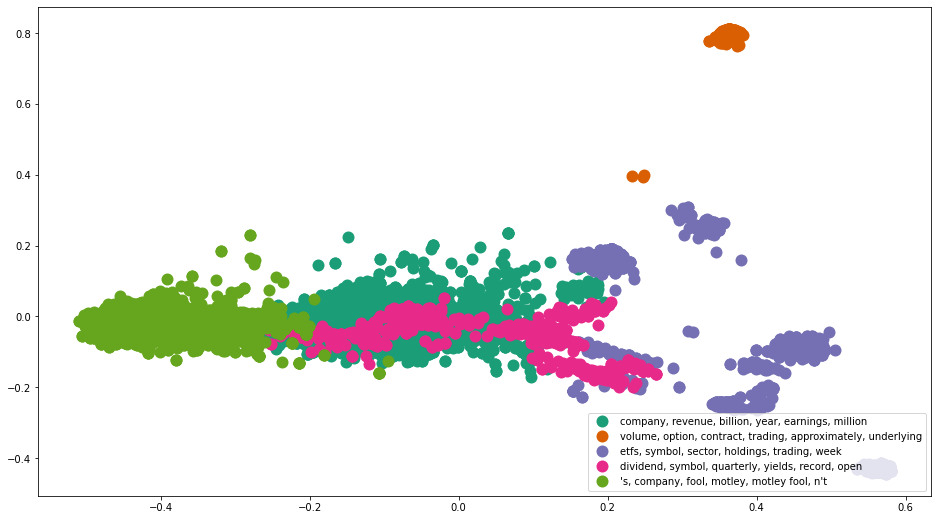

In [36]:
# %matplotlib inline 

#create data frame with PCA cluster results
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=title)) 
groups = df.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

plt.show() #show the plot

In [0]:
plt.close()

## Topic Modeling - Latent Dirichlet Allocation 

In [0]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method = 'online') ## 分成五个topic

In [39]:
# LDA requires integer values, keep first 3 digits
tfidf_matrix_lda = (tfidf_matrix * 100) 
tfidf_matrix_lda = tfidf_matrix_lda.astype(int)
print(tfidf_matrix)

  (0, 318)	0.040636839134760946
  (0, 118)	0.040636839134760946
  (0, 149)	0.040636839134760946
  (0, 265)	0.04045965995306074
  (0, 299)	0.04936293717626012
  (0, 151)	0.04889052911347545
  (0, 266)	0.04889052911347545
  (0, 257)	0.04798311234405676
  (0, 417)	0.04848489435878346
  (0, 322)	0.04812043802069022
  (0, 19)	0.04879097294422237
  (0, 9)	0.04185018799050366
  (0, 407)	0.04302176220746089
  (0, 63)	0.04302176220746089
  (0, 51)	0.04222185004885916
  (0, 411)	0.041806125979141295
  (0, 434)	0.04165279600486957
  (0, 368)	0.04165279600486957
  (0, 3)	0.04165279600486957
  (0, 272)	0.04165279600486957
  (0, 212)	0.04068485622645006
  (0, 413)	0.04160923852090245
  (0, 48)	0.04165279600486957
  (0, 44)	0.04165279600486957
  (0, 364)	0.04165279600486957
  :	:
  (9870, 447)	0.1045069981509181
  (9870, 1)	0.06087932372752541
  (9870, 328)	0.07591155765047941
  (9870, 243)	0.057921739533433755
  (9870, 201)	0.0723997366328744
  (9870, 60)	0.05989885053693192
  (9871, 180)	0.09248856

In [40]:
lda.fit(tfidf_matrix_lda)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [41]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 487)
[[2.00369898e-01 6.94752435e+03 2.00084367e-01 ... 2.00489852e-01
  2.55742997e+03 2.02401025e-01]
 [1.69141920e+01 9.79955335e+03 2.01098981e-01 ... 2.04770575e-01
  2.17593723e+04 2.10628183e-01]
 [2.00188983e-01 1.52575475e+04 2.00094572e-01 ... 2.00288896e-01
  4.50539806e+03 2.00866771e-01]
 [5.85484730e+03 5.63291408e+04 7.52456010e+03 ... 2.10983967e-01
  1.84354575e+04 3.04750512e+02]
 [4.38184041e+03 1.75726700e+04 2.00927976e-01 ... 6.24554041e+03
  1.33924269e+04 2.26622771e+04]]


In [42]:
n_top_words = 7 
topic_keywords_list = []
for i, topic_dist in enumerate(topic_word):
    #Here we select top(n_top_words-1)
    lda_topic_words = np.array(tf_selected_words)[np.argsort(topic_dist)][:-n_top_words:-1] 
    for j in range(len(lda_topic_words)):
        w = lda_topic_words[j]
        try: 
            lda_topic_words[j] = vocab_frame_dict[w]
        except KeyError:
            print("word:{}".format(w))
        
    topic_keywords_list.append(lda_topic_words.tolist())

word:motley fool


In [45]:
# documents and topics matrix
doc_topic = lda.transform(tfidf_matrix_lda)
print (doc_topic.shape)

(9872, 5)


In [51]:
# print out the clusters and topics and titles 
topic_doc_dict = {}
print ("<Document clustering result by LDA>")
for i in range(len(doc_topic)):
    topicID = doc_topic[i].argmax()
    if topicID not in topic_doc_dict:
        topic_doc_dict[topicID] = [title[i]]
    else:
        topic_doc_dict[topicID].append(title[i])
for i in topic_doc_dict:
    print ("Cluster " + str(i) + " words: " + ", ".join(topic_keywords_list[i]))
    print ("Cluster " + str(i) + " title (" + str(len(topic_doc_dict[i])) + " articles): ")
    print (', '.join(topic_doc_dict[i]))
    print ()

<Document clustering result by LDA>
Cluster 3 words: 's, fool, motley, motley fool, n't, company
Cluster 3 title (2374 articles): 
About to Buy Penny Stocks? Look At These 2 Companies First, Here's Why Pacific Biosciences Gained as Much as 10.5% Today, 3 Stocks This Top Wall Street Pro Is Buying Right Now, 3 Top U.S. Stocks to Watch in October, Meet 3 Companies that Are Shaping the Future of Food, Why Pivotal Software  Perspecta  and Agilent Technologies Jumped Today, Why Shares of Travel Stocks Are Falling Today, The Boeing 737 MAX Crisis Will Crush American Airlines' Profit Again in 2020, Winners and Losers From Boeing's 'Even Further' MAX Delay, Why Airline Stocks Are Declining Today, Can Alaska Air Soar Another 684% This Decade?, Will American Airlines Continue to Struggle Over the Next 5 Years?, Why Shares of Casino and Travel Stocks Are Falling Today, Why Shares of Boeing Are Falling Today, Why Southwest Airlines Remains a Buy  Despite Boeing Woes, Can United Airlines Surge Anoth

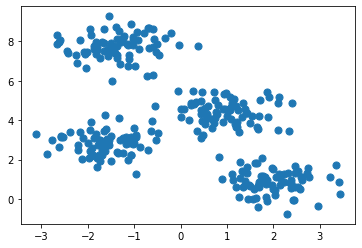

In [52]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

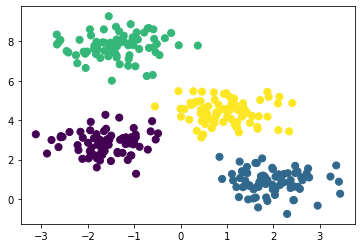

In [53]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50);